*Code author: Vincent SZYMANSKI - vincent.szymanski@gmail.com*

# Scope
This notebook gives some key functions to work with data base using the panda module (https://pandas.pydata.org/)

The web gives you a lot of exemples and documentations on this module:

http://pandas.pydata.org/pandas-docs/stable/10min.html

http://www.python-simple.com/python-pandas/panda-intro.php



In [1]:
#Setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load data and creat a dataframe from csv file


More explaination can be found here : https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/


In [52]:
raw_data = {'name': ['Bob', 'John', 'Tom', 'Walter', 'Luke', 'Dora', 'Jessy', 'Jerry', 'Penny','Perceval', 'Karadoc'], 
        'groupe': ['A','B','A','B','A','B','B','A','A','B','A'], 
        'note1': [14, 11.5, 15, 15, 16,14,16,14.2,16,5,11],
        'note2': [13.0, 9, 7, 13, 13, 14.5,9,8,17,7.0,9.0]}
df = pd.DataFrame(raw_data, columns = ['name', 'groupe', 'note1', 'note2'])
df

,name,groupe,note1,note2
0,Bob,A,14.0,13.0
1,John,B,11.5,9.0
2,Tom,A,15.0,7.0
3,Walter,B,15.0,13.0
4,Luke,A,16.0,13.0
5,Dora,B,14.0,14.5
6,Jessy,B,16.0,9.0
7,Jerry,A,14.2,8.0
8,Penny,A,16.0,17.0
9,Perceval,B,5.0,7.0


In [53]:
df.to_csv('_DATA/simple_csv.csv')
data = pd.read_csv('./_DATA/simple_csv.csv')
data
df

,name,groupe,note1,note2
0,Bob,A,14.0,13.0
1,John,B,11.5,9.0
2,Tom,A,15.0,7.0
3,Walter,B,15.0,13.0
4,Luke,A,16.0,13.0
5,Dora,B,14.0,14.5
6,Jessy,B,16.0,9.0
7,Jerry,A,14.2,8.0
8,Penny,A,16.0,17.0
9,Perceval,B,5.0,7.0


# Display the dataframe

In [54]:
df.head() # return the beginning of the dataframe

,name,groupe,note1,note2
0,Bob,A,14.0,13.0
1,John,B,11.5,9.0
2,Tom,A,15.0,7.0
3,Walter,B,15.0,13.0
4,Luke,A,16.0,13.0


In [55]:
df.tail() # return the end of the dataframe

,name,groupe,note1,note2
6,Jessy,B,16.0,9.0
7,Jerry,A,14.2,8.0
8,Penny,A,16.0,17.0
9,Perceval,B,5.0,7.0
10,Karadoc,A,11.0,9.0


# Selecting data in a dataframe

In [56]:
df.loc[2] # get data from index 2

name      Tom
groupe      A
note1      15
note2       7
Name: 2, dtype: object

In [57]:
df.name[2] # get name from index 2

'Tom'

In [58]:
df.name[2:6] # Sliccing is also working

2       Tom
3    Walter
4      Luke
5      Dora
Name: name, dtype: object

# Get the number of student in groupe A and B

In [59]:
df.groupe.value_counts()

A    6
B    5
Name: groupe, dtype: int64

# Get the proportion of student between groupe A and B

In [60]:
df.groupe.value_counts(normalize=True)

A    0.545455
B    0.454545
Name: groupe, dtype: float64

# Display the proportion of student between groupe A and B
**Using the plot function of panda:**

<IPython.core.display.Javascript object>


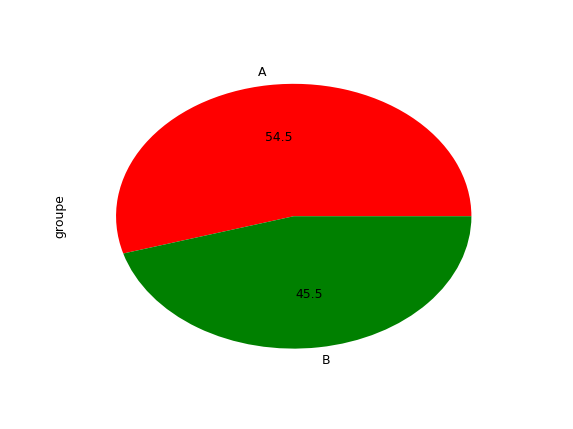

In [61]:
fig = plt.figure()
df.groupe.value_counts(normalize=True).plot.pie(labels=['A','B'], colors= ['r', 'g'], autopct='%.1f')
plt.show()

**Using the plot function of matplotlib**

[ 0.54545455  0.45454545]


<IPython.core.display.Javascript object>


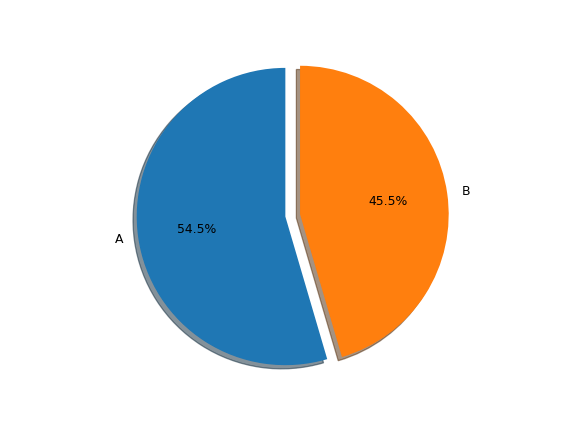

In [67]:
val = df.groupe.value_counts(normalize=True).values
print(val)
explode = (0.1, 0)
label = ['A','B']
fig1, ax1 = plt.subplots()
ax1.pie(val, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Get student list who are in groupe A

In [48]:
df[df.groupe=="A"]

,name,groupe,note1,note2
0,Bob,A,14.0,13.0
4,Luke,A,16.0,13.0
7,Jerry,A,14.2,8.0
8,Penny,A,16.0,17.0
10,Karadoc,A,11.0,9.0


# Make calulation on data

In [49]:
df.note1.mean() # the mean of note1 over all student

13.427272727272726

In [68]:
df.note1[df.groupe=="A"].mean() # the mean of note1 over student from A groupe

14.366666666666667

In [69]:
df.groupby(['groupe']).mean() # count the mean of each note for each groupe

,note1,note2
groupe,,
A,14.366667,11.166667
B,12.300000,10.500000


# Add a row to a data frame

In [72]:
df=df.assign(mean=(df.note1+df.note2)/2) # Compute the mean grade for each student and add it in the dataframe
print(df)
df

        name groupe  note1  note2   mean
0        Bob      A   14.0   13.0  13.50
1       John      B   11.5    9.0  10.25
2        Tom      A   15.0    7.0  11.00
3     Walter      B   15.0   13.0  14.00
4       Luke      A   16.0   13.0  14.50
5       Dora      B   14.0   14.5  14.25
6      Jessy      B   16.0    9.0  12.50
7      Jerry      A   14.2    8.0  11.10
8      Penny      A   16.0   17.0  16.50
9   Perceval      B    5.0    7.0   6.00
10   Karadoc      A   11.0    9.0  10.00


,name,groupe,note1,note2,mean
0,Bob,A,14.0,13.0,13.50
1,John,B,11.5,9.0,10.25
2,Tom,A,15.0,7.0,11.00
3,Walter,B,15.0,13.0,14.00
4,Luke,A,16.0,13.0,14.50
5,Dora,B,14.0,14.5,14.25
6,Jessy,B,16.0,9.0,12.50
7,Jerry,A,14.2,8.0,11.10
8,Penny,A,16.0,17.0,16.50
9,Perceval,B,5.0,7.0,6.00
